In [1]:
# Data Preparation & EDA

In [2]:
pip install pandas numpy matplotlib seaborn nltk spacy sklearn sqlite3 gensim


  Using cached spacy-3.7.6-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:/Users/lenovo/Desktop/Assignment/archive (1)/Reviews.csv')


# Display the first few rows of the dataset
print(df.head())

# Display basic info about the dataset
print(df.info())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
# Perform Initial SQL Queries to Understand Data Distribution

In [5]:
# Create an SQLite database in memory
conn = sqlite3.connect(':memory:')

# Load the DataFrame into the SQLite database
df.to_sql('reviews', conn, index=False, if_exists='replace')

# Example SQL queries
# Query to count the number of reviews per rating
query = """
SELECT Score, COUNT(*) as Review_Count 
FROM reviews 
GROUP BY Score 
ORDER BY Score;
"""
rating_distribution = pd.read_sql(query, conn)
print(rating_distribution)


   Score  Review_Count
0      1         52268
1      2         29769
2      3         42640
3      4         80655
4      5        363122


In [6]:
# Conduct Comprehensive EDA

In [7]:
#a. Analyze Review Length Distribution

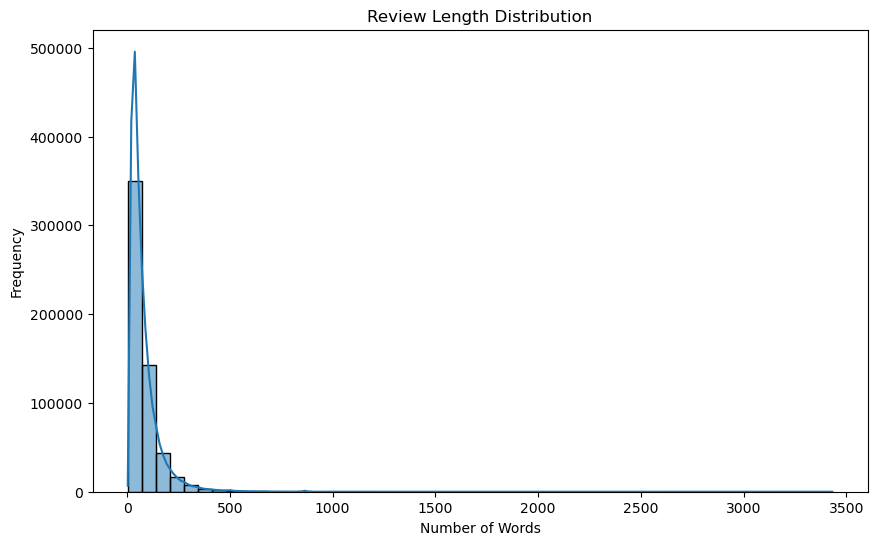

In [8]:
# Add a column for review length
df['Review_Length'] = df['Text'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Review_Length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [9]:
# b. Examine Rating Distribution

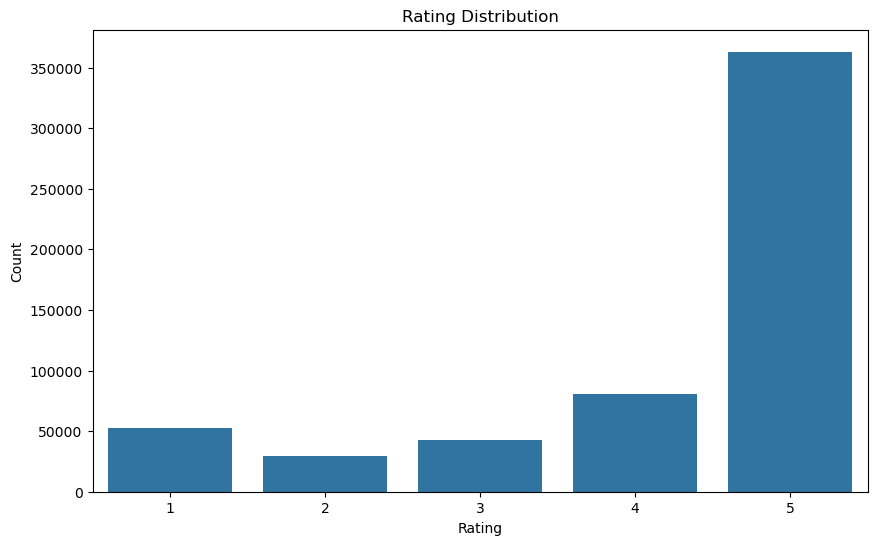

In [10]:
# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [11]:
#c. Investigate Temporal Trends in Reviews

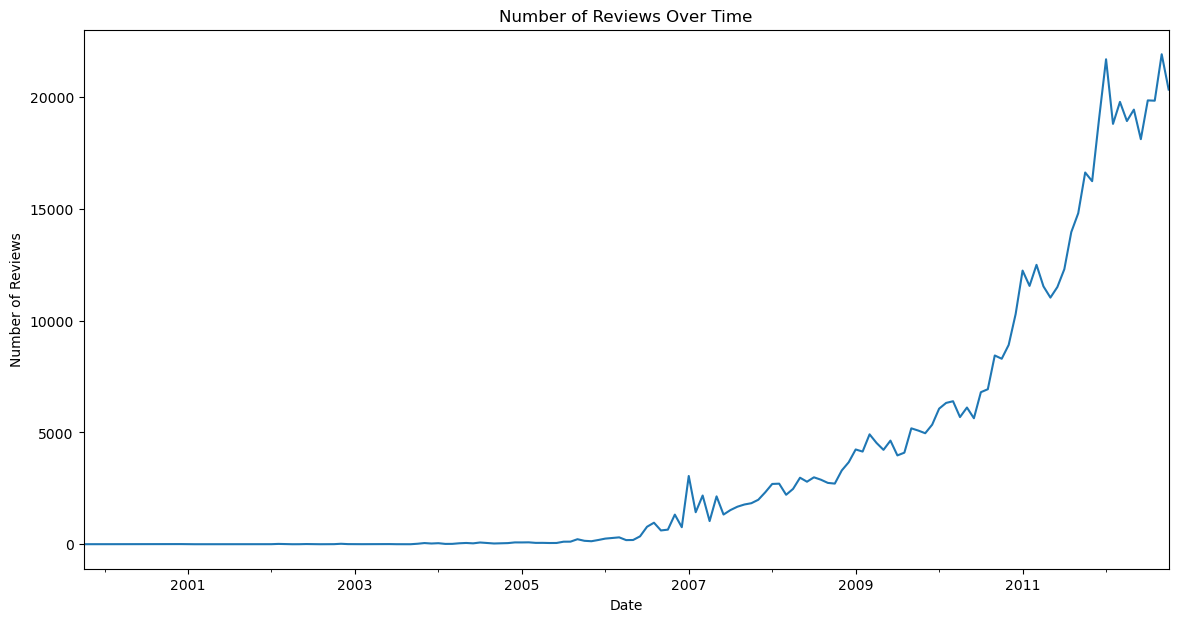

In [12]:
# Convert the 'Time' column to datetime format
df['Date'] = pd.to_datetime(df['Time'], unit='s')

# Plot number of reviews over time
plt.figure(figsize=(14, 7))
df.groupby(df['Date'].dt.to_period('M')).size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


In [13]:
# d. Identify Most Common Words in Positive and Negative Reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


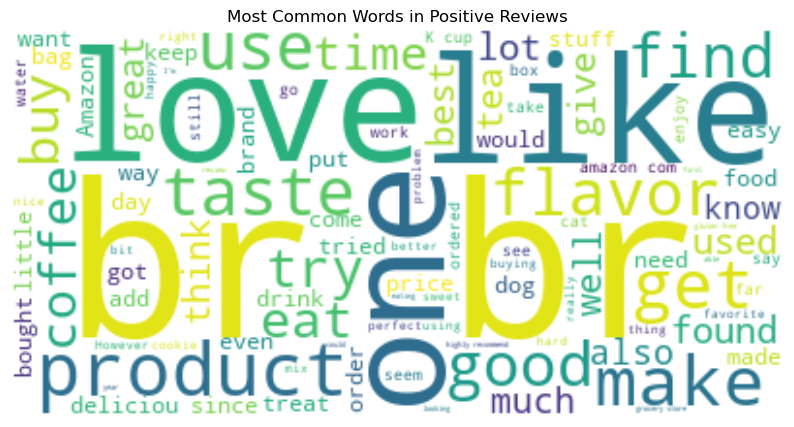

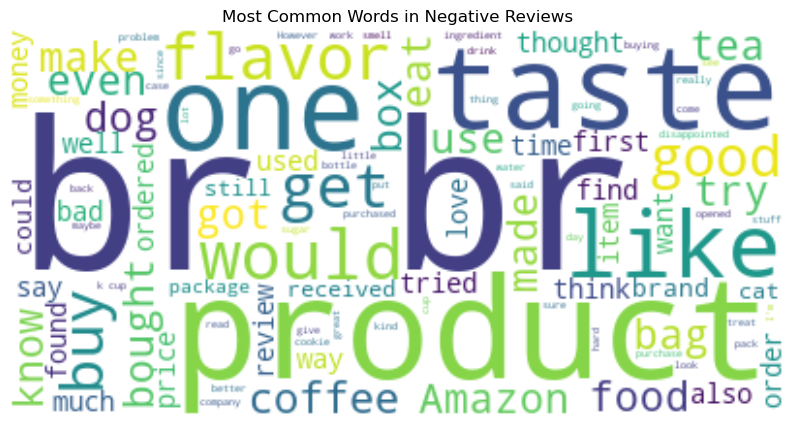

In [14]:
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Split positive and negative reviews
positive_reviews = df[df['Score'] > 3]['Text']
negative_reviews = df[df['Score'] < 3]['Text']

# Function to extract common words
def plot_word_cloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_word_cloud(positive_reviews, 'Most Common Words in Positive Reviews')
plot_word_cloud(negative_reviews, 'Most Common Words in Negative Reviews')


In [15]:
# 2 Text Preprocessing

In [16]:
# a. Implement Text Cleaning

In [17]:
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply the text cleaning function
df['Cleaned_Text'] = df['Text'].apply(clean_text)
print(df['Cleaned_Text'].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Cleaned_Text, dtype: object


In [18]:
# b. Tokenization Using NLTK

In [19]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize the cleaned text
df['Tokens'] = df['Cleaned_Text'].apply(word_tokenize)
print(df['Tokens'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [bought, several, vitality, canned, dog, food,...
1    [product, arrived, labeled, jumbo, salted, pea...
2    [confection, around, century, light, pillowy, ...
3    [looking, secret, ingredient, robitussin, beli...
4    [great, taffy, great, price, wide, assortment,...
Name: Tokens, dtype: object


In [20]:
# Feature Extraction

In [21]:
 Implement TF-IDF Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X_tfidf = tfidf.fit_transform(df['Cleaned_Text'])

print(X_tfidf.shape)


(568454, 5000)
